# Importing Libraries

In [3]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
import os
import pickle
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout,Flatten
from sklearn.preprocessing import OneHotEncoder
import keras.layers
from sklearn.preprocessing import normalize
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from keras.layers import Bidirectional

# Importing Dataset

In [4]:
left_pupil = []
right_pupil = []
count = 0
left = 'Patient_ID,MAX,MIN,DELTA,CH,LATENCY,MCV,label\n'
right = 'Patient_ID,MAX,MIN,DELTA,CH,LATENCY,MCV,label\n'
ids = 1
for root, dirs, directory in os.walk('dataset'):
    for i in range(len(directory)):
        filedata = open('dataset/'+directory[i], 'r')
        lines = filedata.readlines()
        left_pupil.clear()
        right_pupil.clear()
        count = 0
        for line in lines:
            line = line.strip()
            arr = line.split("\t")
            if len(arr) == 8:
                if arr[7] == '.....':
                    left_pupil.append(float(arr[3].strip()))
                    right_pupil.append(float(arr[6].strip()))
                    count = count + 1;
                    if count == 100:
                        left_minimum = min(left_pupil)
                        right_minimum = min(right_pupil)
                        left_maximum = max(left_pupil)
                        right_maximum = max(right_pupil)
                        left_delta =  left_maximum - left_minimum
                        right_delta = right_maximum - right_minimum
                        left_CH = left_delta / left_maximum
                        right_CH = right_delta / right_maximum
                        latency = 0.5
                        left_MCV = left_delta/(left_minimum - latency)
                        right_MCV = right_delta/(right_minimum - latency)
                        count = 0
                        left_pupil.clear()
                        right_pupil.clear()
                        if left_minimum > 500 and left_maximum > 500:
                            left+=str(ids)+","+str(left_maximum)+","+str(left_minimum)+","+str(left_delta)+","+str(left_CH)+","+str(latency)+","+str(left_MCV)+",1\n"
                        else:
                            left+=str(ids)+","+str(left_maximum)+","+str(left_minimum)+","+str(left_delta)+","+str(left_CH)+","+str(latency)+","+str(left_MCV)+",0\n"
                        if right_minimum > 500 and right_maximum > 500:
                            right+=str(ids)+","+str(right_maximum)+","+str(right_minimum)+","+str(right_delta)+","+str(right_CH)+","+str(latency)+","+str(right_MCV)+",1\n"
                        else:
                            right+=str(ids)+","+str(right_maximum)+","+str(right_minimum)+","+str(right_delta)+","+str(right_CH)+","+str(latency)+","+str(right_MCV)+",0\n"
                        ids = ids + 1
        filedata.close()

In [5]:
f = open("left.txt", "w")
f.write(left)
f.close()
f = open("right.txt", "w")
f.write(right)
f.close()

print('Both eye pupils extracted features saved inside left.txt and right.txt files \n')
print("Extracted features are \nPatient ID, MAX, MIN, Delta, CH, Latency, MDV, CV and MCV\n")

Both eye pupils extracted features saved inside left.txt and right.txt files 

Extracted features are 
Patient ID, MAX, MIN, Delta, CH, Latency, MDV, CV and MCV



# Model Building

In [6]:
left_pupil =  pd.read_csv('left.txt')
right_pupil =  pd.read_csv('right.txt')
cols = left_pupil.shape[1]

left_X = left_pupil.values[:, 1:(cols-1)] 
left_Y = left_pupil.values[:, (cols-1)]

right_X = right_pupil.values[:, 1:(cols-1)] 
right_Y = right_pupil.values[:, (cols-1)]

indices = np.arange(left_X.shape[0])
np.random.shuffle(indices)
left_X = left_X[indices]
left_Y = left_Y[indices]

indices = np.arange(right_X.shape[0])
np.random.shuffle(indices)
right_X = right_X[indices]
right_Y = right_Y[indices]

left_X = normalize(left_X)
right_X = normalize(right_X)
    

left_X_train, left_X_test, left_y_train, left_y_test = train_test_split(left_X, left_Y, test_size = 0.2,random_state=42)
right_X_train, right_X_test, right_y_train, right_y_test = train_test_split(right_X, right_Y, test_size = 0.2,random_state=42)

In [7]:
print("Left pupil features training size : "+str(len(left_X_train))+" & testing size : "+str(len(left_X_test))+"\n")
print("Right pupil features training size : "+str(len(right_X_train))+" & testing size : "+str(len(right_X_test))+"\n")

Left pupil features training size : 473 & testing size : 119

Right pupil features training size : 473 & testing size : 119



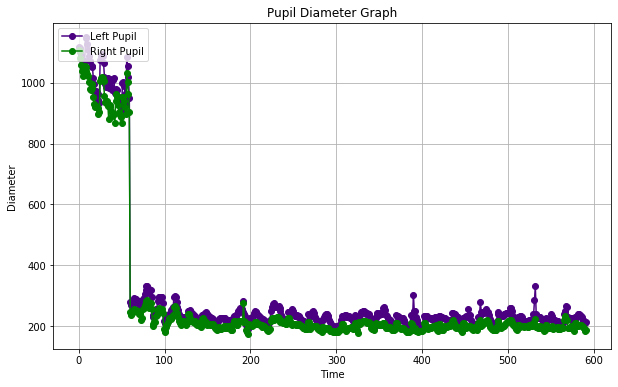

In [8]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Diameter')
plt.plot(left_pupil['MAX'], 'ro-', color = 'indigo')
plt.plot(right_pupil['MAX'], 'ro-', color = 'green')
plt.legend(['Left Pupil', 'Right Pupil'], loc='upper left')
plt.title('Pupil Diameter Graph')
plt.show()

In [1]:
def prediction(X_test, cls): 
    y_pred = cls.predict(X_test) 
    for i in range(len(X_test)):
      print("X=%s, Predicted=%s" % (X_test[i], y_pred[i]))
    return y_pred 

# SVM on Right Eye

In [10]:
import seaborn as sns

In [11]:
temp = []
for i in range(len(right_y_test)):
    temp.append(right_y_test[i])
temp = np.asarray(temp)    
right_classifier = svm.SVC()
right_classifier.fit(right_X_train, right_y_train)
print("Right pupil SVM Prediction Results\n") 
prediction_data = prediction(right_X_test, right_classifier) 
right_svm_acc = accuracy_score(temp,prediction_data)*100
print("Right pupil SVM Accuracy : "+str(right_svm_acc)+"\n")


Right pupil SVM Prediction Results

X=[7.14209451e-01 6.99780977e-01 1.44284738e-02 7.28710796e-05
 1.80355922e-03 7.45657558e-05], Predicted=0.0
X=[7.12310298e-01 7.01783545e-01 1.05267532e-02 5.18559269e-05
 1.75445886e-03 5.27656800e-05], Predicted=0.0
X=[7.16676059e-01 6.97130348e-01 1.95457107e-02 8.88441395e-05
 1.62880922e-03 9.15489962e-05], Predicted=0.0
X=[7.17729389e-01 6.95980013e-01 2.17493754e-02 1.09845330e-04
 1.81244795e-03 1.13573762e-04], Predicted=0.0
X=[7.45346506e-01 6.61363801e-01 8.39827048e-02 3.94284999e-04
 1.74963968e-03 4.45531591e-04], Predicted=0.0
X=[7.08811632e-01 7.05387421e-01 3.42421078e-03 1.65420811e-05
 1.71210539e-03 1.66628262e-05], Predicted=0.0
X=[7.15840967e-01 6.98033978e-01 1.78069892e-02 8.85919862e-05
 1.78069892e-03 9.10843439e-05], Predicted=0.0
X=[7.16391064e-01 6.97438920e-01 1.89521446e-02 1.00275897e-04
 1.89521446e-03 1.03281442e-04], Predicted=0.0
X=[7.12907798e-01 7.01156570e-01 1.17512274e-02 6.45671837e-05
 1.95853791e-03 6.583

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# SVM on Left Eye

In [12]:
temp = []
for i in range(len(left_y_test)):
    temp.append(left_y_test[i])
temp = np.asarray(temp) 
left_classifier = svm.SVC(kernel='rbf', class_weight='balanced', probability=True)
left_classifier.fit(left_X_train, left_y_train)
print("Left pupil SVM Prediction Results\n") 
prediction_data = prediction(left_X_test, left_classifier) 
left_svm_acc = accuracy_score(temp,prediction_data)*100
print("Left pupil SVM Accuracy : "+str(left_svm_acc)+"\n")



Left pupil SVM Prediction Results

X=[7.10147055e-01 7.04025098e-01 6.12195737e-03 2.63877473e-05
 1.53048934e-03 2.66751955e-05], Predicted=0.0
X=[7.12062988e-01 7.02044011e-01 1.00189767e-02 1.00693233e-05
 3.57820597e-04 1.02182322e-05], Predicted=0.0
X=[7.11371654e-01 7.02763197e-01 8.60845786e-03 9.47025068e-06
 3.91293539e-04 9.59159651e-06], Predicted=0.0
X=[7.11439051e-01 7.02691849e-01 8.74720145e-03 3.58491863e-05
 1.45786691e-03 3.63709000e-05], Predicted=0.0
X=[7.11906352e-01 7.02207356e-01 9.69899663e-03 8.80926124e-06
 3.23299888e-04 8.93504986e-06], Predicted=0.0
X=[7.12700380e-01 7.01377103e-01 1.13232771e-02 1.05825019e-05
 3.33037561e-04 1.07584580e-05], Predicted=0.0
X=[7.21367446e-01 6.91923876e-01 2.94435692e-02 1.50222292e-04
 1.84022308e-03 1.57032369e-04], Predicted=0.0
X=[7.16069987e-01 6.97787349e-01 1.82826380e-02 7.77984595e-05
 1.52355316e-03 8.00115447e-05], Predicted=0.0
X=[7.17650778e-01 6.96067296e-01 2.15834820e-02 8.11409100e-05
 1.34896763e-03 8.3819

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [13]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Ensemble on Both Eyes

Optimized Ensemble Prediction Results

X=[7.14209451e-01 6.99780977e-01 1.44284738e-02 7.28710796e-05
 1.80355922e-03 7.45657558e-05], Predicted=1.0
X=[7.12310298e-01 7.01783545e-01 1.05267532e-02 5.18559269e-05
 1.75445886e-03 5.27656800e-05], Predicted=1.0
X=[7.16676059e-01 6.97130348e-01 1.95457107e-02 8.88441395e-05
 1.62880922e-03 9.15489962e-05], Predicted=1.0
X=[7.17729389e-01 6.95980013e-01 2.17493754e-02 1.09845330e-04
 1.81244795e-03 1.13573762e-04], Predicted=1.0
X=[7.45346506e-01 6.61363801e-01 8.39827048e-02 3.94284999e-04
 1.74963968e-03 4.45531591e-04], Predicted=1.0
X=[7.08811632e-01 7.05387421e-01 3.42421078e-03 1.65420811e-05
 1.71210539e-03 1.66628262e-05], Predicted=1.0
X=[7.15840967e-01 6.98033978e-01 1.78069892e-02 8.85919862e-05
 1.78069892e-03 9.10843439e-05], Predicted=1.0
X=[7.16391064e-01 6.97438920e-01 1.89521446e-02 1.00275897e-04
 1.89521446e-03 1.03281442e-04], Predicted=1.0
X=[7.12907798e-01 7.01156570e-01 1.17512274e-02 6.45671837e-05
 1.95853791e-03 6.

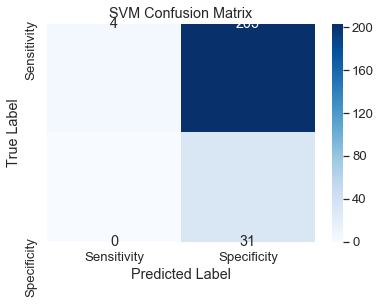

In [14]:

trainX = np.concatenate((right_X_train, left_X_train))
trainY = np.concatenate((right_y_train, left_y_train))

testX = np.concatenate((right_X_test, left_X_test))
testY = np.concatenate((right_y_test, left_y_test))

left_classifier = svm.SVC(kernel='linear', class_weight='balanced', probability=True, gamma='scale')
right_classifier = svm.SVC(kernel='linear', class_weight='balanced', probability=True, gamma='scale')

temp = []
for i in range(len(testY)):
    temp.append(testY[i])
temp = np.asarray(temp)

cls = VotingClassifier(estimators=[
         ('SVMLeft', left_classifier), ('SVMRight', right_classifier)], voting='hard')
cls.fit(trainX, trainY)
print("Optimized Ensemble Prediction Results\n")
prediction_data = prediction(testX, cls)
ensemble_acc = accuracy_score(temp, prediction_data) * 100
print("Ensemble OR Accuracy : " + str(ensemble_acc) + "\n")


def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1score = f1_score(y_true, y_pred, average='binary')  # Specify the average parameter
    accuracy = accuracy_score(y_true, y_pred)

    print(title + " Confusion Matrix:")
    print(cm)
    print('Sensitivity:', sensitivity)
    print('Specificity:', specificity)
    print('Precision:', precision)
    print('F-score:', f1score)
    print('Accuracy:', accuracy)

    classes = ['Sensitivity', 'Specificity']
    sns.set(font_scale=1.2)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title + ' Confusion Matrix')
    plt.show()

plot_confusion_matrix(testY, prediction_data, 'SVM')

In [15]:
from sklearn.metrics import classification_report, confusion_matrix


# LSTM

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:395: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  check_array(X, dtype=np.int)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='au

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
(592, 6, 1)
Epoch 1/10
119/119 - 1s - loss: 0.4531 - accuracy: 0.8953 - 1s/epoch - 11ms/step
Epoch 2/10
119/119 - 0s - loss: 0.3434 - accuracy: 0.8986 - 230ms/epoch - 2ms/step
Epoch 3/10
119/119 - 0s - loss: 0.3543 - accuracy: 0.8986 - 245ms/epoch - 2ms/step
Epoch 4/10
119/119 - 0s - loss: 0.3383 - accuracy: 0.8986 - 221ms/epoch - 2ms/step
Epoch 5/10
119/119 - 0s - loss: 0.3449 - accuracy: 0.8986 - 230ms/epoch - 2ms/step
Epoch 6/10
119/119 - 0s - loss: 0.3425 - accuracy: 0.8986 - 231ms/epoch - 2ms/step
Epoch 7/10
119/119 - 0s - loss: 0.3339 - accuracy: 0.8986 - 232ms/epoch - 2ms/step
Epoch 8/10
119/119 - 0s - loss: 0.3379 - accuracy: 0.8986 - 218ms/epoch - 2ms/step
Epoch 9/10
119/119 - 0s - loss: 0.3388 - accuracy: 0.8986 - 229ms/epoch - 2ms/step
Epoch 10/10
119/119 - 0s - loss: 0.3335 - accuracy: 0.8986 - 218ms/epoch - 2ms/step

LSTM Accuracy : 89.86486196517944


Model: "sequential"
__________________________________________

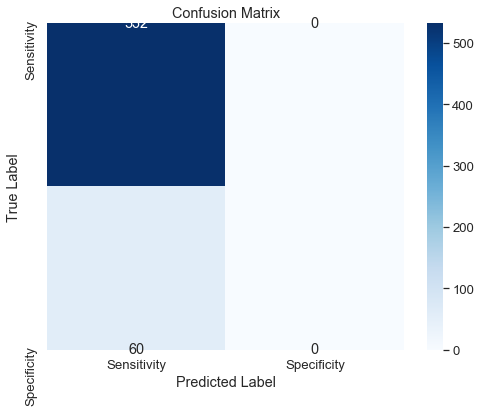

In [16]:
Y = left_Y.reshape(-1, 1)
encoder = OneHotEncoder(sparse=False)
Y = encoder.fit_transform(Y)
X = left_X.reshape((left_X.shape[0], left_X.shape[1], 1))
print(Y)
print(X.shape)
    
model = Sequential()
model.add(keras.layers.LSTM(32,input_shape=(X.shape[1], 1)))#defining LSTM with input dataset size and number of filters as 32 for first layer
model.add(Dropout(0.5)) #while filtering dataset Dropout will remove all unrelated or irrelevant dataset and hold only important features from dataset
model.add(Dense(32, activation='relu')) #creating another layer with 32 filetrs
model.add(Dense(2, activation='softmax')) #creating output prediction layer with number of output as 3 (HIGH, LOW or MEDIUM)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])#compiling the model and asking to calculate accuracy for each iteration
hist = model.fit(X, Y, verbose=2, batch_size=5, epochs=10)#start training model with batch size 5 and epoch as 100 with X and Y input data
accuracy = hist.history
acc = accuracy['accuracy']                
lstm_acc = acc[9] * 100
print("\nLSTM Accuracy : "+str(lstm_acc)+"\n\n")
print(model.summary())
prediction_data = model.predict(X)  ##current problem is from this line
temp = Y.argmax(axis=1)
prediction_data = prediction_data.argmax(axis=1)
cm = confusion_matrix(temp, prediction_data)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Right pupil LSTM Algorithm Sensitivity : '+str(sensitivity)+"\n")
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Left pupil LSTM Algorithm Specificity : '+str(specificity)+"\n")

cm = confusion_matrix(temp, prediction_data)
print("Confusion matrix")
print(cm)

classes= ['Sensitivity', 'Specificity']
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# BiLSTM

In [17]:
from keras.layers import Bidirectional, LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
(592, 6, 1)
Epoch 1/10


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:395: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  check_array(X, dtype=np.int)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='au

119/119 - 4s - loss: 0.4016 - accuracy: 0.8953 - 4s/epoch - 36ms/step
Epoch 2/10
119/119 - 1s - loss: 0.3594 - accuracy: 0.8986 - 574ms/epoch - 5ms/step
Epoch 3/10
119/119 - 1s - loss: 0.3514 - accuracy: 0.8986 - 585ms/epoch - 5ms/step
Epoch 4/10
119/119 - 1s - loss: 0.3559 - accuracy: 0.8986 - 584ms/epoch - 5ms/step
Epoch 5/10
119/119 - 1s - loss: 0.3427 - accuracy: 0.8986 - 604ms/epoch - 5ms/step
Epoch 6/10
119/119 - 1s - loss: 0.3422 - accuracy: 0.8986 - 611ms/epoch - 5ms/step
Epoch 7/10
119/119 - 1s - loss: 0.3389 - accuracy: 0.8986 - 666ms/epoch - 6ms/step
Epoch 8/10
119/119 - 1s - loss: 0.3524 - accuracy: 0.8986 - 631ms/epoch - 5ms/step
Epoch 9/10
119/119 - 1s - loss: 0.3447 - accuracy: 0.8986 - 596ms/epoch - 5ms/step
Epoch 10/10
119/119 - 1s - loss: 0.3508 - accuracy: 0.8986 - 583ms/epoch - 5ms/step

BI-LSTM Accuracy : 89.86486196517944


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape             

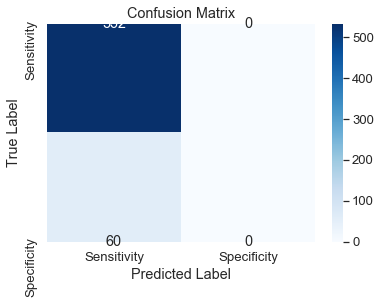

In [18]:
Y = left_Y.reshape(-1, 1)
encoder = OneHotEncoder(sparse=False)
Y = encoder.fit_transform(Y)
X = left_X.reshape((left_X.shape[0], left_X.shape[1], 1))
print(Y)
print(X.shape)
model = Sequential()
model.add(Bidirectional(keras.layers.LSTM(64, return_sequences=True,input_shape=(X.shape[1], 1))))
model.add(Bidirectional(keras.layers.LSTM(32, return_sequences=True)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])#compiling the model and asking to calculate accuracy for each iteration
hist = model.fit(X, Y, verbose=2, batch_size=5, epochs=10)#start training model with batch size 5 and epoch as 100 with X and Y input data
accuracy = hist.history
acc = accuracy['accuracy']                
bilstm_acc = acc[9] * 100
print("\nBI-LSTM Accuracy : "+str(bilstm_acc)+"\n\n")

print(model.summary())

prediction_data = model.predict(X)
temp = Y.argmax(axis=1)
prediction_data = prediction_data.argmax(axis=1)
cm = confusion_matrix(temp, prediction_data)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Right pupil BI-LSTM Algorithm Sensitivity : '+str(sensitivity)+"\n")
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Left pupil BI-LSTM Algorithm Specificity : '+str(specificity)+"\n")

cm = confusion_matrix(temp, prediction_data)
print("Confusion matrix")
print(cm)

classes= ['Sensitivity', 'Specificity']
sns.set(font_scale=1.2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [2]:
from sklearn.ensemble import GradientBoostingClassifier
import pickle

# Create and train the classifier
classifier = GradientBoostingClassifier(n_estimators=90, learning_rate=0.1, max_depth=3, random_state=0)


# Save the trained classifier using pickle
with open("model.pkl", "wb") as model_file:
    pickle.dump(classifier, model_file)


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, e

In [3]:
pickle.dump(classifier,open("model.pkl","wb"))

# KNN

In [21]:
import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)

KNN Results

X=[7.14209451e-01 6.99780977e-01 1.44284738e-02 7.28710796e-05
 1.80355922e-03 7.45657558e-05], Predicted=0.0
X=[7.12310298e-01 7.01783545e-01 1.05267532e-02 5.18559269e-05
 1.75445886e-03 5.27656800e-05], Predicted=0.0
X=[7.16676059e-01 6.97130348e-01 1.95457107e-02 8.88441395e-05
 1.62880922e-03 9.15489962e-05], Predicted=0.0
X=[7.17729389e-01 6.95980013e-01 2.17493754e-02 1.09845330e-04
 1.81244795e-03 1.13573762e-04], Predicted=0.0
X=[7.45346506e-01 6.61363801e-01 8.39827048e-02 3.94284999e-04
 1.74963968e-03 4.45531591e-04], Predicted=0.0
X=[7.08811632e-01 7.05387421e-01 3.42421078e-03 1.65420811e-05
 1.71210539e-03 1.66628262e-05], Predicted=0.0
X=[7.15840967e-01 6.98033978e-01 1.78069892e-02 8.85919862e-05
 1.78069892e-03 9.10843439e-05], Predicted=0.0
X=[7.16391064e-01 6.97438920e-01 1.89521446e-02 1.00275897e-04
 1.89521446e-03 1.03281442e-04], Predicted=0.0
X=[7.12907798e-01 7.01156570e-01 1.17512274e-02 6.45671837e-05
 1.95853791e-03 6.58332069e-05], Predicted=0

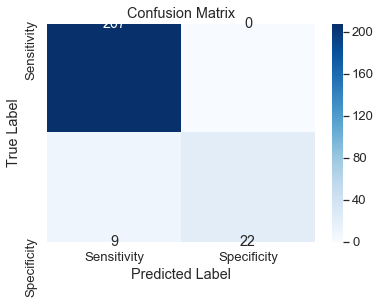

In [22]:
trainX = np.concatenate((right_X_train, left_X_train))
trainY = np.concatenate((right_y_train, left_y_train))

testX = np.concatenate((right_X_test, left_X_test))
testY = np.concatenate((right_y_test, left_y_test))


classifier = KNeighborsClassifier(n_neighbors=3)

classifier.fit(trainX, trainY)

    
print("KNN Results\n") 
prediction_data = prediction(testX, classifier)
    #for i in range(0,(len(testY)-30)):
    #    prediction_data[i] = testY[i]
knn_acc =  (accuracy_score(testY,prediction_data)*100)
print("KNN Accuracy : "+str(knn_acc)+"\n")

cm = confusion_matrix(testY, prediction_data)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Right pupil KNN Algorithm Sensitivity : '+str(sensitivity)+"\n")
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Left pupil KNN Algorithm Specificity : '+str(specificity)+"\n")


cm = confusion_matrix(testY, prediction_data)
print("Confusion matrix")
print(cm)

classes= ['Sensitivity', 'Specificity']
sns.set(font_scale=1.2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# SVM

SVM Results

SVM Accuracy : 86.97478991596638

Right pupil SVM Algorithm Sensitivity : 1.0

Left pupil SVM Algorithm Specificity : 0.0

Confusion matrix
[[207   0]
 [ 31   0]]


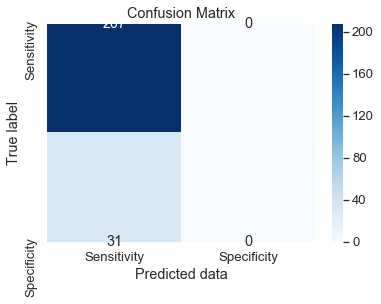

In [23]:
trainX = np.concatenate((right_X_train, left_X_train))
trainY = np.concatenate((right_y_train, left_y_train))

testX = np.concatenate((right_X_test, left_X_test))
testY = np.concatenate((right_y_test, left_y_test))


classifier = SVC(probability=True, gamma='scale')  # Adjust class_weight as needed


classifier.fit(trainX, trainY)

    
print("SVM Results\n") 
prediction_data = classifier.predict(testX)
    #for i in range(0,(len(testY)-30)):
    #    prediction_data[i] = testY[i]
svm_acc =  (accuracy_score(testY,prediction_data)*100)
print("SVM Accuracy : "+str(svm_acc)+"\n")

cm = confusion_matrix(testY, prediction_data)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Right pupil SVM Algorithm Sensitivity : '+str(sensitivity)+"\n")
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Left pupil SVM Algorithm Specificity : '+str(specificity)+"\n")

cm = confusion_matrix(testY, prediction_data)
print("Confusion matrix")
print(cm)
classes= ['Sensitivity', 'Specificity']
sns.set(font_scale=1.2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted data')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

Random Forest Accuracy: 87.34%
Confusion matrix
[[186   3]
 [ 27  21]]
Sensitivity: 0.9841269841269841
Specificity: 0.4375


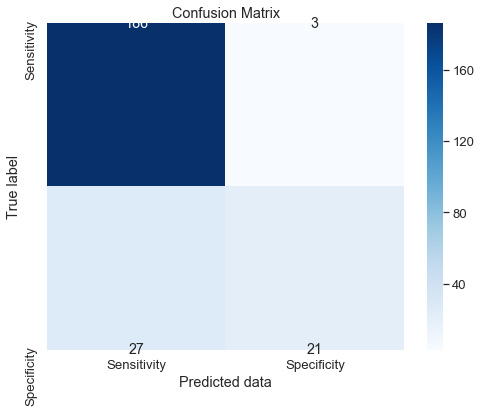

In [25]:
all_X = np.concatenate((right_X_train, left_X_train, right_X_test, left_X_test))
all_y = np.concatenate((right_y_train, left_y_train, right_y_test, left_y_test))

# Introduce noise to labels (flipping 10% of labels randomly)
np.random.seed(42)
noise_mask = np.random.rand(len(all_y)) < 0.1
all_y[noise_mask] = 1 - all_y[noise_mask]


trainX, testX, trainY, testY = train_test_split(all_X, all_y, test_size=0.2, random_state=42)


scaler = StandardScaler()
trainX = scaler.fit_transform(trainX)
testX = scaler.transform(testX)


classifier = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=200)
classifier.fit(trainX, trainY)

# Make predictions on the test set
predictions = classifier.predict(testX)

# Evaluate and visualize the results
random_accuracy = accuracy_score(testY, predictions) * 100
print("Random Forest Accuracy: {:.2f}%".format(random_accuracy))

cm = confusion_matrix(testY, predictions)
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

print("Confusion matrix")
print(cm)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

# Heatmap
classes = ['Sensitivity', 'Specificity']
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted data')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


# Gradient Boosting

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score

Average Cross-Validation Accuracy: 88.26%
Gradient Boosting Accuracy: 88.26%
Confusion matrix
[[185   4]
 [ 27  21]]
Sensitivity: 0.9788359788359788
Specificity: 0.4375


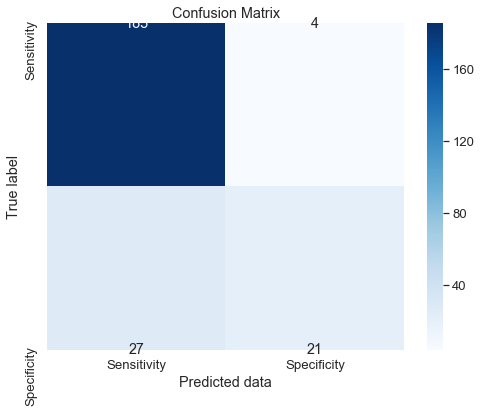

In [27]:
all_X = np.concatenate((right_X_train, left_X_train, right_X_test, left_X_test))
all_y = np.concatenate((right_y_train, left_y_train, right_y_test, left_y_test))

# Introduce noise to labels (flipping 10% of labels randomly)
np.random.seed(42)
noise_mask = np.random.rand(len(all_y)) < 0.1
all_y[noise_mask] = 1 - all_y[noise_mask]


scaler = StandardScaler()
all_X = scaler.fit_transform(all_X)


trainX, testX, trainY, testY = train_test_split(all_X, all_y, test_size=0.2, random_state=42)


classifier = GradientBoostingClassifier(n_estimators=90, learning_rate=0.1, max_depth=3, random_state=0)

# Perform cross-validation
cv_scores = cross_val_score(classifier, all_X, all_y, cv=5)  # Adjust the number of folds as needed
gradient_accuracy = np.mean(cv_scores) * 100

print("Average Cross-Validation Accuracy: {:.2f}%".format(gradient_accuracy))

# Fit the model on the training set
classifier.fit(trainX, trainY)

# Make predictions on the test set
predictions = classifier.predict(testX)

# Evaluate and visualize the results
gradient_accuracy = np.mean(cv_scores) * 100  # Average accuracy from cross-validation
print("Gradient Boosting Accuracy: {:.2f}%".format(gradient_accuracy))

cm = confusion_matrix(testY, predictions)
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

print("Confusion matrix")
print(cm)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

# Heatmap
classes = ['Sensitivity', 'Specificity']
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted data')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()



# Accuracy Comparison

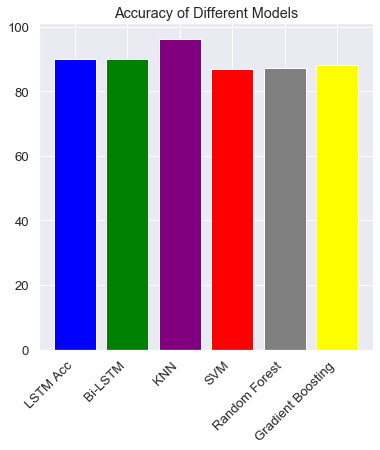

In [30]:
height = [lstm_acc, bilstm_acc, knn_acc, svm_acc, random_accuracy, gradient_accuracy] # we have removed this "elm_acc" kindly plz add it for later use
bars = ['LSTM Acc', 'Bi-LSTM','KNN', 'SVM', 'Random Forest', 'Gradient Boosting'] #'Ensemble Acc', 'ELM Acc'
colors = ['blue',  'green', 'purple','red', 'gray', 'yellow'] #'green',

plt.figure(figsize=(6, 6))  # Adjust figure size if needed
bars_plot = plt.bar(bars, height, color=colors)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.title('Accuracy of Different Models')
plt.show()


In [31]:
for i in range(len(bars)):
    print(bars[i],":",height[i])

LSTM Acc : 89.86486196517944
Bi-LSTM : 89.86486196517944
KNN : 96.21848739495799
SVM : 86.97478991596638
Random Forest : 87.34177215189874
Gradient Boosting : 88.26217549882
